In [1]:
import numpy as np
import pandas as po
from collections import Counter
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split

In [3]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, SVMSMOTE, BorderlineSMOTE, ADASYN

In [5]:
df = po.read_csv('data/ahrae_processed.csv')
df

,Age,Thermal sensation,PMV,Air temperature (¡C),Air temperature (¡F),Radiant temperature (¡C),Radiant temperature (¡F),Globe temperature (¡C),Globe temperature (¡F),Relative humidity (%),...,Velocity_l (m/s),Velocity_l (fpm),Outdoor monthly air temperature (¡C),Outdoor monthly air temperature (¡F),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Sex_Female,Sex_Male
0,15.0,-0.0,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0,0,1,0,1,0
1,15.0,-2.0,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0,0,1,0,1,0
2,15.0,0.0,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0,0,1,0,0,1
3,14.0,-2.0,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0,0,1,0,1,0
4,15.0,-0.0,0.1,24.2,75.6,23.6,74.4,24.0,75.2,50.2,...,0.08,16.54,25.0,77.00,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58886,17.0,-2.0,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0,0,0,1,1,0
58887,15.0,-0.0,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0,0,0,1,1,0
58888,16.0,-1.0,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0,0,0,1,1,0
58889,16.0,1.0,0.1,23.8,74.9,23.6,74.4,22.1,71.8,67.4,...,0.08,16.54,18.6,65.45,0,0,0,1,0,1


(array([ 5023.,     0., 10059.,     0.,     0., 26551.,     0., 10248.,
            0.,  7010.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <a list of 10 Patch objects>)

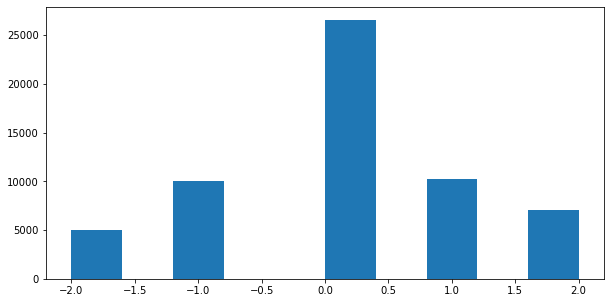

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(df['Thermal sensation'])

In [7]:
# Vanilla RandomForestClassifier
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.20521645497747687

In [8]:
# Vanilla SMOTE Resampled RandomForestClassifier
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=500).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.5803516439715376

In [9]:
# SMOTE Resampled RandomForestClassifier with undersampling
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
oversample = SMOTE(sampling_strategy={-0.0: 26551, -2.0: 11000, 1.0: 11000, -1.0: 11000, 2.0: 11000})
undersample = RandomUnderSampler(sampling_strategy={-0.0: 11000, -2.0: 11000, 1.0: 11000, -1.0: 11000, 2.0: 11000})
X, y = oversample.fit_resample(X, y)
X, y = undersample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=300).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.36712897549262935

In [10]:
# Vanilla SMOTE is better? Wierd 

In [6]:
# Borderline-SMOTE
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=300).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.5994446735161193

In [23]:
# Borderline-SMOTE SVM
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=300).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

In [13]:
# ADASYN
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=300).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.5482739642472262

In [29]:
# ADASYN with outliers removed
df_o = df[(np.abs(zscore(df)) < 3).all(axis=1)]
X = df_o.drop('Thermal sensation', axis=1)
y = df_o['Thermal sensation']
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=300).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.5526434799307772

In [42]:
df[(np.abs(zscore(df)) > 3).any(axis=1)] 

,Age,Thermal sensation,PMV,Air temperature (¡C),Air temperature (¡F),Radiant temperature (¡C),Radiant temperature (¡F),Globe temperature (¡C),Globe temperature (¡F),Relative humidity (%),...,Velocity_l (m/s),Velocity_l (fpm),Outdoor monthly air temperature (¡C),Outdoor monthly air temperature (¡F),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Sex_Female,Sex_Male
34,26.0,0.0,-0.3,26.4,79.5,23.6,74.4,25.5,78.0,31.7,...,0.08,16.54,32.8,91.00,0,0,1,0,0,0
89,38.0,2.0,0.1,26.0,78.8,23.6,74.4,25.9,78.7,53.4,...,0.08,16.54,32.8,91.00,0,0,1,0,0,0
387,32.0,2.0,2.3,31.6,88.9,23.6,74.4,23.3,73.9,66.0,...,0.08,16.54,30.4,86.70,0,1,0,0,0,1
388,32.0,2.0,2.3,31.6,88.9,23.6,74.4,23.3,73.9,66.0,...,0.08,16.54,30.4,86.70,0,1,0,0,0,1
389,32.0,2.0,2.2,31.6,88.9,23.6,74.4,23.3,73.9,66.0,...,0.08,16.54,30.4,86.70,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58824,17.0,-1.0,0.1,23.8,74.9,23.6,74.4,20.9,69.6,64.0,...,0.08,16.54,18.6,65.45,0,0,0,1,0,1
58825,16.0,0.0,0.1,23.8,74.9,23.6,74.4,20.9,69.6,64.0,...,0.08,16.54,18.6,65.45,0,0,0,1,0,1
58826,16.0,-1.0,0.1,23.8,74.9,23.6,74.4,20.9,69.6,64.0,...,0.08,16.54,18.6,65.45,0,0,0,1,1,0
58827,15.0,0.0,0.1,23.8,74.9,23.6,74.4,20.9,69.6,64.0,...,0.08,16.54,18.6,65.45,0,0,0,1,1,0


In [43]:
col = 'Age'

32.0

In [100]:
df_o = df.copy()

In [101]:
for col in df_o.columns:
    mean = df_o[col].mean()
    std = df_o[col].std()
    median = df_o[col].median()

    df_o[col] = np.where(np.logical_or(abs(df[col] - mean) > 3*std, abs(df[col] - mean) < -3*std), median, df_o[col])

In [102]:
len(df_o)

58891

In [103]:
# Borderline-SMOTE with outliers replaced by median
X = df_o.drop('Thermal sensation', axis=1)
y = df_o['Thermal sensation']
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, max_features=7, n_estimators=300).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.5956206617823325

In [104]:
# Seem to have reached the limit of RandomForests

In [9]:
# XGBoost without SMOTE
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = XGBClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.2097517203885718

In [10]:
# XGBoost with Borderline-SMOTE
X = df.drop('Thermal sensation', axis=1)
y = df['Thermal sensation']
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = XGBClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)
y_pred = regr.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.4417840607247703